In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_to_train_set='./gdrive/MyDrive/Datasets/LWF_DATASET/pairsDevTrain.txt'
path_to_test_set ='./gdrive/MyDrive/Datasets/LWF_DATASET/pairsDevTest.txt'

In [ ]:
def makeLen4(num):
  #num is a string
  num=('0'*(4-len(num)))+num
  return num

def convertSameNameToPath(name,num1,num2):
  num1=makeLen4(num1)
  num2=makeLen4(num2)

  path1= os.path.join(name,(name+"_"+num1+".jpg"))
  path2= os.path.join(name,(name+"_"+num2+".jpg"))

  return [path1,path2,1]

def convertDiffNameToPath(name1,num1,name2,num2):
  num1=makeLen4(num1)
  num2=makeLen4(num2)

  path1= os.path.join(name1,(name1+"_"+num1+".jpg"))
  path2= os.path.join(name2,(name2+"_"+num2+".jpg"))

  return [path1,path2,0]

In [ ]:
import os

train_pairs=[]

with open(path_to_train_set,"r") as f:
  lines_train=f.readlines()
  no_of_matched_pairs=int(lines_train[0])

  for i in range(1,no_of_matched_pairs+1):
    name1,num1,num2= lines_train[i].split()
    train_pairs.append( convertSameNameToPath(name1,num1,num2 ) )
    # if i==4:
    #   break

  for i in range(no_of_matched_pairs+1,2*no_of_matched_pairs+1):
    name1,num1,name2,num2 = lines_train[i].split()
    train_pairs.append( convertDiffNameToPath(name1,num1,name2,num2 ))

    # if i==no_of_matched_pairs+4:
    #   break

for li in train_pairs:
  print(li)

['Aaron_Peirsol/Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol/Aaron_Peirsol_0002.jpg', 1]
['Aaron_Peirsol/Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol/Aaron_Peirsol_0004.jpg', 1]
['Aaron_Sorkin/Aaron_Sorkin_0001.jpg', 'Aaron_Sorkin/Aaron_Sorkin_0002.jpg', 1]
['Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg', 'Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg', 1]
['Abdullah/Abdullah_0001.jpg', 'Abdullah/Abdullah_0003.jpg', 1]
['Abdullah/Abdullah_0002.jpg', 'Abdullah/Abdullah_0004.jpg', 1]
['Abdullah_al-Attiyah/Abdullah_al-Attiyah_0001.jpg', 'Abdullah_al-Attiyah/Abdullah_al-Attiyah_0003.jpg', 1]
['Abdullah_al-Attiyah/Abdullah_al-Attiyah_0002.jpg', 'Abdullah_al-Attiyah/Abdullah_al-Attiyah_0003.jpg', 1]
['Abel_Pacheco/Abel_Pacheco_0001.jpg', 'Abel_Pacheco/Abel_Pacheco_0004.jpg', 1]
['Abel_Pacheco/Abel_Pacheco_0003.jpg', 'Abel_Pacheco/Abel_Pacheco_0004.jpg', 1]
['Adam_Sandler/Adam_Sandler_0001.jpg', 'Adam_Sandler/Adam_Sandler_0003.jpg', 1]
['Adam_Sandler/Adam_Sandler_0001.jpg', 'Adam_Sandler/Adam_Sa

In [ ]:
print("No of total train pairs: ",len(train_pairs))
print("Two example pairs:" )
print(train_pairs[0])
print(train_pairs[1101])

No of total train pairs:  2200
Two example pairs:
['Aaron_Peirsol/Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol/Aaron_Peirsol_0002.jpg', 1]
['Aaron_Sorkin/Aaron_Sorkin_0002.jpg', 'Frank_Solich/Frank_Solich_0005.jpg', 0]


[]

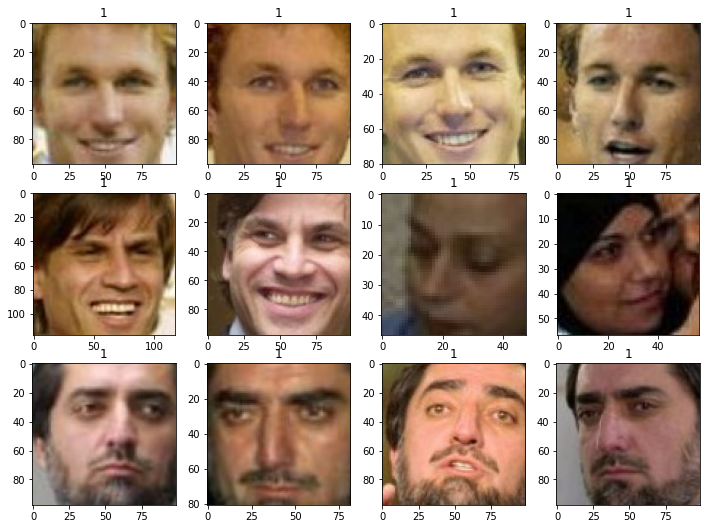

In [ ]:
from PIL import Image #, ImageDraw, ImageFont
import matplotlib.pyplot as plt 

ind = 1
fig = plt.figure(figsize=(12, 12))
for li in train_pairs:
  # fig = plt.figure(figsize=(12, 12))
  for i in range(0,2):
    img = Image.open(os.path.join('./gdrive/MyDrive/Datasets/','Cropped_lfw',li[i]))
    ax = fig.add_subplot(4, 4, ind)
    ax.set_title(li[2])
    plt.imshow(img)
    ind += 1
  # plt.plot()
  if(ind >= 12):
    break
    
plt.plot()

In [ ]:
pos_train=[]
neg_train=[]

for x in train_pairs:
  if x[2]==0:
    neg_train.append(x)
  else:
    pos_train.append(x)

In [ ]:
print(len(pos_train))
print(pos_train[0])

print(len(neg_train))
print(neg_train[0])


1100
['Aaron_Peirsol/Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol/Aaron_Peirsol_0002.jpg', 1]
1100
['AJ_Cook/AJ_Cook_0001.jpg', 'Marsha_Thomason/Marsha_Thomason_0001.jpg', 0]


For Validation data


In [ ]:
import os

val_pairs=[]

with open(path_to_test_set,"r") as f:
  lines_val=f.readlines()
  no_of_matched_pairs=int(lines_val[0])

  for i in range(1,no_of_matched_pairs+1):
    name1,num1,num2= lines_val[i].split()
    val_pairs.append( convertSameNameToPath(name1,num1,num2 ) )
    # if i==4:
    #   break

  for i in range(no_of_matched_pairs+1,2*no_of_matched_pairs+1):
    name1,num1,name2,num2 = lines_val[i].split()
    val_pairs.append( convertDiffNameToPath(name1,num1,name2,num2 ))

    # if i==no_of_matched_pairs+4:
    #   break

for li in val_pairs:
  print(li)

['Abdullah_Gul/Abdullah_Gul_0013.jpg', 'Abdullah_Gul/Abdullah_Gul_0014.jpg', 1]
['Abdullah_Gul/Abdullah_Gul_0013.jpg', 'Abdullah_Gul/Abdullah_Gul_0016.jpg', 1]
['Abdullatif_Sener/Abdullatif_Sener_0001.jpg', 'Abdullatif_Sener/Abdullatif_Sener_0002.jpg', 1]
['Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg', 'Adel_Al-Jubeir/Adel_Al-Jubeir_0003.jpg', 1]
['Al_Pacino/Al_Pacino_0001.jpg', 'Al_Pacino/Al_Pacino_0002.jpg', 1]
['Alan_Greenspan/Alan_Greenspan_0001.jpg', 'Alan_Greenspan/Alan_Greenspan_0005.jpg', 1]
['Albert_Costa/Albert_Costa_0002.jpg', 'Albert_Costa/Albert_Costa_0006.jpg', 1]
['Albert_Costa/Albert_Costa_0004.jpg', 'Albert_Costa/Albert_Costa_0006.jpg', 1]
['Albert_Costa/Albert_Costa_0005.jpg', 'Albert_Costa/Albert_Costa_0006.jpg', 1]
['Alejandro_Atchugarry/Alejandro_Atchugarry_0001.jpg', 'Alejandro_Atchugarry/Alejandro_Atchugarry_0002.jpg', 1]
['Alex_Penelas/Alex_Penelas_0001.jpg', 'Alex_Penelas/Alex_Penelas_0002.jpg', 1]
['Ali_Naimi/Ali_Naimi_0001.jpg', 'Ali_Naimi/Ali_Naimi_0003.jpg', 1]


In [ ]:
print("No of total val pairs: ",len(val_pairs))
print("Two example pairs:" )
print(val_pairs[0])
print(val_pairs[501])

No of total val pairs:  1000
Two example pairs:
['Abdullah_Gul/Abdullah_Gul_0013.jpg', 'Abdullah_Gul/Abdullah_Gul_0014.jpg', 1]
['Aaron_Guiel/Aaron_Guiel_0001.jpg', 'Reese_Witherspoon/Reese_Witherspoon_0003.jpg', 0]


Abdullah_Gul/Abdullah_Gul_0013.jpg
Abdullah_Gul/Abdullah_Gul_0014.jpg
Abdullah_Gul/Abdullah_Gul_0013.jpg
Abdullah_Gul/Abdullah_Gul_0016.jpg
Abdullatif_Sener/Abdullatif_Sener_0001.jpg
Abdullatif_Sener/Abdullatif_Sener_0002.jpg
Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg
Adel_Al-Jubeir/Adel_Al-Jubeir_0003.jpg
Al_Pacino/Al_Pacino_0001.jpg
Al_Pacino/Al_Pacino_0002.jpg
Alan_Greenspan/Alan_Greenspan_0001.jpg
Alan_Greenspan/Alan_Greenspan_0005.jpg


[]

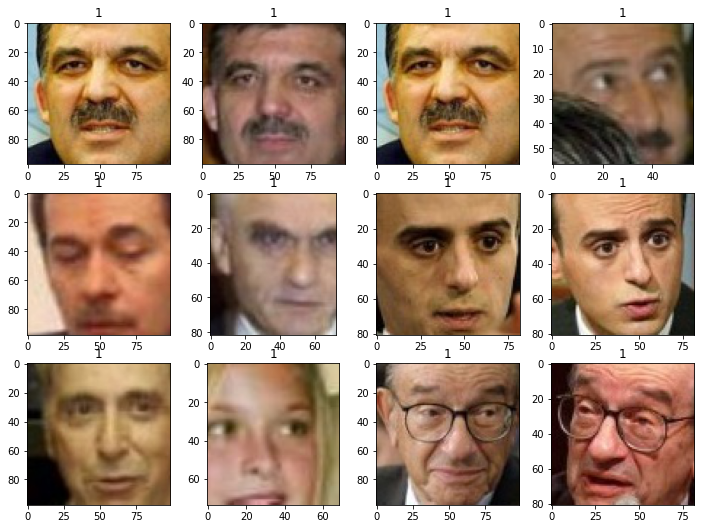

In [ ]:
from PIL import Image #, ImageDraw, ImageFont
import matplotlib.pyplot as plt 

ind = 1
fig = plt.figure(figsize=(12, 12))
for li in val_pairs:
  print(li[0])
  print(li[1])
  # fig = plt.figure(figsize=(12, 12))
  for i in range(0,2):
    img = Image.open(os.path.join('./gdrive/MyDrive/Datasets/','Cropped_lfw',li[i]))
    ax = fig.add_subplot(4, 4, ind)
    ax.set_title(li[2])
    plt.imshow(img)
    ind += 1
  # plt.plot()
  if(ind >= 12):
    break
    
plt.plot()
# see the wrong crop in the 10th example

In [ ]:
pos_val=[]
neg_val=[]

for x in val_pairs:
  if x[2]==0:
    neg_val.append(x)
  else:
    pos_val.append(x)

In [ ]:
print(len(pos_val))
print(pos_val[0])

print(len(neg_val))
print(neg_val[0])


500
['Abdullah_Gul/Abdullah_Gul_0013.jpg', 'Abdullah_Gul/Abdullah_Gul_0014.jpg', 1]
500
['AJ_Lamas/AJ_Lamas_0001.jpg', 'Zach_Safrin/Zach_Safrin_0001.jpg', 0]


In [ ]:
print("Total no of train data: ",len(neg_train)+len(pos_train))
print("Total no of test data : ",len(neg_val)+len(neg_val))

print("Total no of positive data in training set: ",len(pos_train))
print("Total no of negative data in training set: ",len(neg_train))

print("Total no of positive data in testing set: ",len(pos_val))
print("Total no of negative data in testing set: ",len(neg_val))


Total no of train data:  2200
Total no of test data :  1000
Total no of positive data in training set:  1100
Total no of negative data in training set:  1100
Total no of positive data in testing set:  500
Total no of negative data in testing set:  500


In [ ]:
import random

Final_train=pos_train+neg_train
random.shuffle(Final_train)

Final_val=pos_val+neg_val
random.shuffle(Final_val)

In [ ]:
for li in Final_train:
  print(li)

['Frederique_van_der_Wal/Frederique_van_der_Wal_0001.jpg', 'Scott_Wallach/Scott_Wallach_0001.jpg', 0]
['Andrew_Cuomo/Andrew_Cuomo_0002.jpg', 'Jean-Rene_Fourtou/Jean-Rene_Fourtou_0001.jpg', 0]
['Joan_Laporta/Joan_Laporta_0002.jpg', 'Joan_Laporta/Joan_Laporta_0007.jpg', 1]
['Laila_Ali/Laila_Ali_0001.jpg', 'Laila_Ali/Laila_Ali_0002.jpg', 1]
['David_Duke/David_Duke_0001.jpg', 'Yoon_Won-Sik/Yoon_Won-Sik_0001.jpg', 0]
['Wolfgang_Schuessel/Wolfgang_Schuessel_0001.jpg', 'Wolfgang_Schuessel/Wolfgang_Schuessel_0003.jpg', 1]
['Nathalie_Baye/Nathalie_Baye_0001.jpg', 'Nathalie_Baye/Nathalie_Baye_0003.jpg', 1]
['Irwan_Fadzi_Idris/Irwan_Fadzi_Idris_0001.jpg', 'Kathy_Bates/Kathy_Bates_0001.jpg', 0]
['Susan_Sarandon/Susan_Sarandon_0002.jpg', 'Susan_Sarandon/Susan_Sarandon_0006.jpg', 1]
['Elizabeth_Hurley/Elizabeth_Hurley_0004.jpg', 'Elizabeth_Hurley/Elizabeth_Hurley_0005.jpg', 1]
['Luis_Guzman/Luis_Guzman_0001.jpg', 'Thomas_Ulrich/Thomas_Ulrich_0001.jpg', 0]
['Ari_Fleischer/Ari_Fleischer_0008.jpg', 'Ar

In [ ]:
for li in Final_val:
  print(li)

['Jen_Bice/Jen_Bice_0001.jpg', 'Martha_Burk/Martha_Burk_0002.jpg', 0]
['Jim_Cantalupo/Jim_Cantalupo_0001.jpg', 'Joe_Pantoliano/Joe_Pantoliano_0001.jpg', 0]
['Georgi_Parvanov/Georgi_Parvanov_0001.jpg', 'Georgi_Parvanov/Georgi_Parvanov_0002.jpg', 1]
['Luis_Horna/Luis_Horna_0002.jpg', 'Luis_Horna/Luis_Horna_0005.jpg', 1]
['Vicente_Fernandez/Vicente_Fernandez_0004.jpg', 'Vicente_Fernandez/Vicente_Fernandez_0005.jpg', 1]
['Dick_Clark/Dick_Clark_0001.jpg', 'Dick_Clark/Dick_Clark_0003.jpg', 1]
['Richard_Gere/Richard_Gere_0001.jpg', 'Richard_Gere/Richard_Gere_0010.jpg', 1]
['Emma_Watson/Emma_Watson_0002.jpg', 'Emma_Watson/Emma_Watson_0003.jpg', 1]
['Carlos_Manuel_Pruneda/Carlos_Manuel_Pruneda_0001.jpg', 'Carlos_Manuel_Pruneda/Carlos_Manuel_Pruneda_0003.jpg', 1]
['Begum_Khaleda_Zia/Begum_Khaleda_Zia_0001.jpg', 'Jesse_Jackson/Jesse_Jackson_0005.jpg', 0]
['Jorge_Quiroga/Jorge_Quiroga_0001.jpg', 'Surakait_Sathirathai/Surakait_Sathirathai_0001.jpg', 0]
['James_Kopp/James_Kopp_0002.jpg', 'James_Kopp

In [ ]:
print("Train size: ",len(Final_train))
print("Valid size: ",len(Final_val))

Train size:  2200
Valid size:  1000


In [ ]:
for li in Final_train:
  li[2]=str(li[2])
for li in Final_val:
  li[2]=str(li[2])


In [ ]:
Train_set_final= [  " ".join(lis) for lis in Final_train ]
Valid_set_final= [  " ".join(lis) for lis in Final_val ]

In [ ]:
for s in Train_set_final:
  print(s)

Frederique_van_der_Wal/Frederique_van_der_Wal_0001.jpg Scott_Wallach/Scott_Wallach_0001.jpg 0
Andrew_Cuomo/Andrew_Cuomo_0002.jpg Jean-Rene_Fourtou/Jean-Rene_Fourtou_0001.jpg 0
Joan_Laporta/Joan_Laporta_0002.jpg Joan_Laporta/Joan_Laporta_0007.jpg 1
Laila_Ali/Laila_Ali_0001.jpg Laila_Ali/Laila_Ali_0002.jpg 1
David_Duke/David_Duke_0001.jpg Yoon_Won-Sik/Yoon_Won-Sik_0001.jpg 0
Wolfgang_Schuessel/Wolfgang_Schuessel_0001.jpg Wolfgang_Schuessel/Wolfgang_Schuessel_0003.jpg 1
Nathalie_Baye/Nathalie_Baye_0001.jpg Nathalie_Baye/Nathalie_Baye_0003.jpg 1
Irwan_Fadzi_Idris/Irwan_Fadzi_Idris_0001.jpg Kathy_Bates/Kathy_Bates_0001.jpg 0
Susan_Sarandon/Susan_Sarandon_0002.jpg Susan_Sarandon/Susan_Sarandon_0006.jpg 1
Elizabeth_Hurley/Elizabeth_Hurley_0004.jpg Elizabeth_Hurley/Elizabeth_Hurley_0005.jpg 1
Luis_Guzman/Luis_Guzman_0001.jpg Thomas_Ulrich/Thomas_Ulrich_0001.jpg 0
Ari_Fleischer/Ari_Fleischer_0008.jpg Ari_Fleischer/Ari_Fleischer_0013.jpg 1
Tom_Ridge/Tom_Ridge_0002.jpg Tom_Ridge/Tom_Ridge_0018.jp

In [ ]:
for s in Valid_set_final:
  print(s)

Jen_Bice/Jen_Bice_0001.jpg Martha_Burk/Martha_Burk_0002.jpg 0
Jim_Cantalupo/Jim_Cantalupo_0001.jpg Joe_Pantoliano/Joe_Pantoliano_0001.jpg 0
Georgi_Parvanov/Georgi_Parvanov_0001.jpg Georgi_Parvanov/Georgi_Parvanov_0002.jpg 1
Luis_Horna/Luis_Horna_0002.jpg Luis_Horna/Luis_Horna_0005.jpg 1
Vicente_Fernandez/Vicente_Fernandez_0004.jpg Vicente_Fernandez/Vicente_Fernandez_0005.jpg 1
Dick_Clark/Dick_Clark_0001.jpg Dick_Clark/Dick_Clark_0003.jpg 1
Richard_Gere/Richard_Gere_0001.jpg Richard_Gere/Richard_Gere_0010.jpg 1
Emma_Watson/Emma_Watson_0002.jpg Emma_Watson/Emma_Watson_0003.jpg 1
Carlos_Manuel_Pruneda/Carlos_Manuel_Pruneda_0001.jpg Carlos_Manuel_Pruneda/Carlos_Manuel_Pruneda_0003.jpg 1
Begum_Khaleda_Zia/Begum_Khaleda_Zia_0001.jpg Jesse_Jackson/Jesse_Jackson_0005.jpg 0
Jorge_Quiroga/Jorge_Quiroga_0001.jpg Surakait_Sathirathai/Surakait_Sathirathai_0001.jpg 0
James_Kopp/James_Kopp_0002.jpg James_Kopp/James_Kopp_0003.jpg 1
Charley_Armey/Charley_Armey_0001.jpg Jose_Cevallos/Jose_Cevallos_0001.

In [ ]:
# checking for common elements
def common_member(a, b):
	a_set = set(a)
	b_set = set(b)

	if (a_set & b_set):
		print(a_set & b_set)
	else:
		print("No common elements")
	
common_member(Train_set_final, Valid_set_final)

No common elements


In [ ]:
To_write_in_file=[Train_set_final,Valid_set_final]

File_names =['./gdrive/MyDrive/Datasets/LWF_DATASET/pairsDevTrainMod.txt','./gdrive/MyDrive/Datasets/LWF_DATASET/pairsDevValidMod.txt']

for ind,sets in enumerate(To_write_in_file):
  with open(File_names[ind],"w") as f:
    for element in sets:
      f.write(element + "\n")

# Old Works

In [ ]:
# with open(path_to_test_set,"r") as f:
#   lines_test=f.readlines()

In [ ]:
# pos_test=[]
# neg_test=[]

# for line in lines_test:
#   x=line.split()
#   if x[2]=="0":
#     neg_test.append(x)
#   else:
#     pos_test.append(x)

In [ ]:
# print("Total no of train data: ",len(lines_train))
# print("Total no of test data : ",len(lines_test))

# print("Total no of positive data in training set: ",len(pos_train))
# print("Total no of negative data in training set: ",len(neg_train))

# print("Total no of positive data in testing set: ",len(pos_test))
# print("Total no of negative data in testing set: ",len(neg_test))


Total no of train data:  2200
Total no of test data :  1000
Total no of positive data in training set:  1100
Total no of negative data in training set:  1100
Total no of positive data in testing set:  500
Total no of negative data in testing set:  500


In [ ]:
# import random

# # splitting positive train data
# total_pos_train=len(pos_train)
# total_pos_train_split=int(0.85*total_pos_train)
# total_pos_validation_split = total_pos_train-total_pos_train_split

# random.shuffle(pos_train)

# final_pos_train_data= [  pos_train[i]   for i in range(total_pos_train_split) ]
# final_pos_valid_data = [  pos_train[i]   for i in range(total_pos_train_split,total_pos_train)]

# assert len(final_pos_train_data)==total_pos_train_split, f"Pos train data size mismatched. Found {len(final_pos_train_data)}, but expected {total_pos_train_split}"
# assert len(final_pos_valid_data)==total_pos_validation_split, f"Pos train data size mismatched. Found {len(final_pos_valid_data)}, but expected {total_pos_validation_split}"


# # splitting negative train data
# total_neg_train=len(neg_train)
# total_neg_train_split=int(0.85*total_neg_train)
# total_neg_validation_split = total_neg_train-total_neg_train_split

# random.shuffle(neg_train)

# final_neg_train_data= [  neg_train[i]   for i in range(total_neg_train_split) ]
# final_neg_valid_data =[  neg_train[i]   for i in range(total_neg_train_split,total_neg_train)]

# assert len(final_neg_train_data)==total_neg_train_split, f"Pos train data size mismatched. Found {len(final_neg_train_data)}, but expected {total_neg_train_split}"
# assert len(final_neg_valid_data)==total_neg_validation_split, f"Pos train data size mismatched. Found {len(final_neg_valid_data)}, but expected {total_neg_validation_split}"


In [ ]:
# print("Total no of train data before split: ",len(lines_train))
# print("Total no of test data before split : ",len(lines_test))

# print("Total no of positive data in training set after split  : ",total_pos_train_split)
# print("Total no of positive data in validation set after split: ",total_pos_validation_split)

# print("Total no of negative data in training set after split  : ",total_neg_train_split)
# print("Total no of negative data in validation set after split: ",total_neg_validation_split)

# print("Total no of positive data in testing set: ",len(pos_test))
# print("Total no of negative data in testing set: ",len(neg_test))

Total no of train data before split:  2200
Total no of test data before split :  1000
Total no of positive data in training set after split  :  935
Total no of positive data in validation set after split:  165
Total no of negative data in training set after split  :  935
Total no of negative data in validation set after split:  165
Total no of positive data in testing set:  500
Total no of negative data in testing set:  500


In [ ]:
# Train_set_final=final_pos_train_data+final_neg_train_data
# random.shuffle(Train_set_final)

# Valid_set_final=final_pos_valid_data+final_neg_valid_data
# random.shuffle(Valid_set_final)

# Test_set_final =pos_test+neg_test
# random.shuffle(Test_set_final)

In [ ]:
# print("Train size: ",len(Train_set_final))
# print("Valid size: ",len(Valid_set_final))
# print("Test  size: ",len(Test_set_final))

Train size:  1870
Valid size:  330
Test  size:  1000


In [ ]:
# Train_set_final= [  " ".join(lis) for lis in Train_set_final ]
# Valid_set_final= [  " ".join(lis) for lis in Valid_set_final ]
# Test_set_final=  [  " ".join(lis) for lis in Test_set_final ]

In [ ]:
# # checking for common elements
# def common_member(a, b):
# 	a_set = set(a)
# 	b_set = set(b)

# 	if (a_set & b_set):
# 		print(a_set & b_set)
# 	else:
# 		print("No common elements")
	
# common_member(Train_set_final, Valid_set_final)
# common_member(Train_set_final, Test_set_final)
# common_member(Valid_set_final, Test_set_final)

No common elements
No common elements
No common elements


In [ ]:
# To_write_in_file=[Train_set_final,Valid_set_final,Test_set_final]

# File_names =['./gdrive/MyDrive/Datasets/LWF_DATASET/Final_lfw_train_pairs.txt','./gdrive/MyDrive/Datasets/LWF_DATASET/Final_lfw_valid_pairs.txt','./gdrive/MyDrive/Datasets/LWF_DATASET/Final_lfw_test_pairs.txt']

# for ind,sets in enumerate(To_write_in_file):
#   with open(File_names[ind],"w") as f:
#     for element in sets:
#       f.write(element + "\n")